In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

Modified Bessel function $I_0(r)$

$$
I_0\left(r\right) = \dfrac{1}{\pi} \int ^{\pi}_{0}d\theta e^{r\cos\theta}.
$$

In [2]:
def mod_bessel(r):
    
    def f(theta, r):
        return np.exp(r*np.cos(theta))
    
    i = integrate.quad(f, 0., np.pi, args = (r, ))
    
    return i[0]/np.pi

False dismissal probability $\beta$

\begin{equation}
\beta\left(\Lambda_*, \epsilon\right)=e^{-\frac{\epsilon^2}{2}}\int_0^{\sqrt{\Lambda_*}}u\,e^{-\frac{1}{2}u}I_0\left(\epsilon u\right)du,
\end{equation}

In [3]:
def beta(lm, ep): # Exact expression for beta
    
    
    def g(u, ep):
        r = u*np.exp(-0.5*(u**2))*mod_bessel(ep*u)
        return r
    
    i = integrate.quad(g, 0., np.sqrt(lm), args = (ep, ))
    
    r = np.exp(-0.5*ep**2)*i[0] 
    
    return r

False dismissal probability $\beta$ approximated

\begin{equation}
\beta\left(\Lambda_*, \epsilon\right)=1-e^{-\Lambda_*/2}-\dfrac{1}{4}\epsilon^2\Lambda_* e^{-\Lambda_*/2}.
\end{equation}

In [4]:
def beta_approx(lm, ep): # Approximate expression for beta
    
    a = np.exp(-0.5*lm)
    
    b = 1-a-0.25*(ep**2)*lm*a
    
    return b

In [5]:
lambda_star = 3.18721
epsilon = 1.3
dif = abs(beta(lambda_star, epsilon)-beta_approx(lambda_star, epsilon))
dif_rel = abs(beta(lambda_star, epsilon)-beta_approx(lambda_star, epsilon))/beta(lambda_star, epsilon)
print(f"For epsilon = {epsilon} the difference between the real value of beta and its approximation is {dif}")
print(f"For epsilon = {epsilon} the % difference between the real value of beta and its approximation is {dif_rel}")

For epsilon = 1.3 the difference between the real value of beta and its approximation is 0.027330911210595055
For epsilon = 1.3 the % difference between the real value of beta and its approximation is 0.04964546228814179


In [13]:
l = 1.5 # Domain lenght interval for the plot. Can be a float. 
ep_domain = [0.01*i for i in range(int(100*l))]
plot_beta = [beta(lambda_star, ep) for ep in ep_domain]
plot_beta_approx = [beta_approx(lambda_star, ep) for ep in ep_domain]
delta_rel = [(plot_beta[i]-plot_beta_approx[i])/plot_beta[i] for i in range(len(ep_domain))]

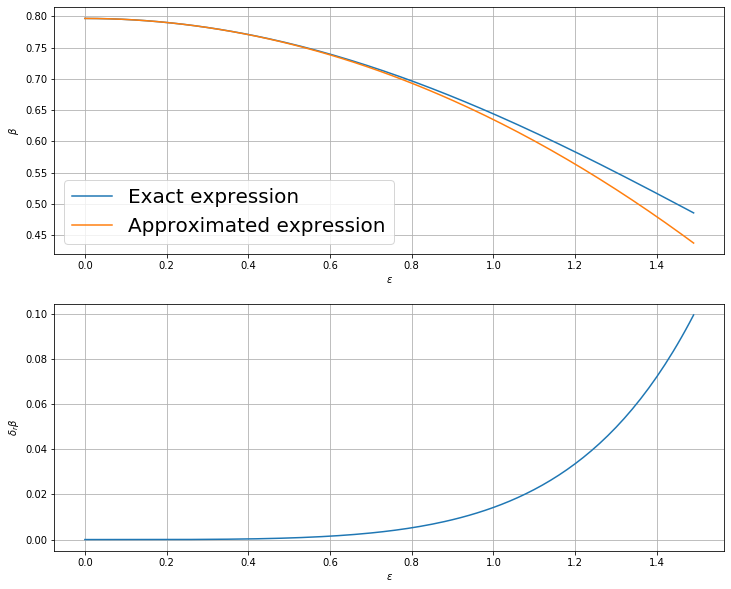

In [17]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (12, 10))

ax1.plot(ep_domain, plot_beta, "-", label = "Exact expression")
ax1.plot(ep_domain, plot_beta_approx, "-", label = "Approximated expression")
ax1.set(xlabel=r'$\epsilon$', ylabel=r'$\beta$')
ax1.grid()
ax1.legend(prop={'size': 20})

ax2.plot(ep_domain, delta_rel, "-")
ax2.set(xlabel=r'$\epsilon$', ylabel=r'$\delta_r\beta$')
ax2.grid()

plt.show()